IMPORTING LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


LOADING DATA:

In [2]:
ds=pd.read_csv(r"/Users/Mouna_sk2005/Downloads/Churn_Modelling.csv")

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df=pd.DataFrame(ds)

In [5]:
le=LabelEncoder()
df["Geography"]=le.fit_transform(df["Geography"])
df["Gender"]=le.fit_transform(df["Gender"])


In [6]:
for column in df.select_dtypes(include=['object']).columns:
    df[column]=le.fit_transform(df[column])

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [8]:
df.corr()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.001682,0.005840,-0.010358,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005689,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
Surname,0.001682,0.005689,1.000000,0.007489,-0.022878,-0.002049,0.005550,-0.017412,0.002657,-0.016460,-0.008993,0.001483,0.011850,-0.010822
CreditScore,0.005840,0.005308,0.007489,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.010358,0.006516,-0.022878,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.018196,-0.002641,-0.002049,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,0.005550,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,-0.017412,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.002657,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,-0.016460,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820


In [9]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

VISUALISING DATA:

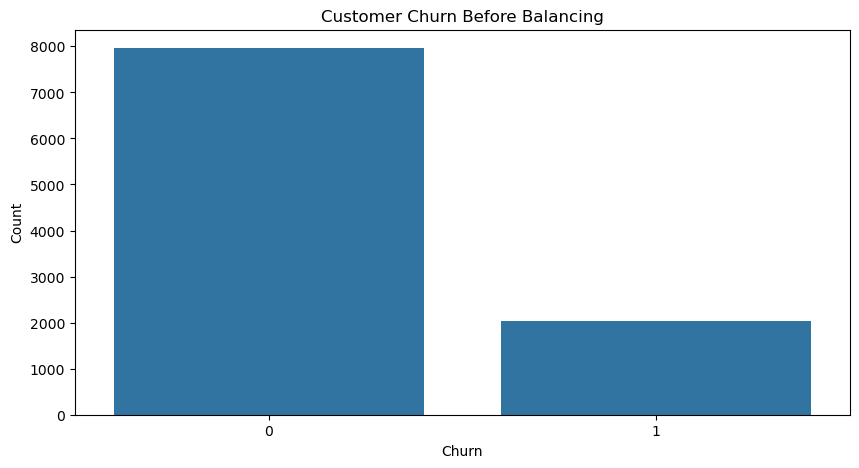

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Before Balancing')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

PREPROCESSING THE DATA:

In [11]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [12]:
x = pd.get_dummies(x, drop_first=True)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

BALANCING DATA:

In [15]:
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

y_train_balanced_df = pd.DataFrame(y_train_balanced, columns=['Exited'])


In [16]:
print(y_train_balanced.value_counts())

Exited
1    5547
0    5547
Name: count, dtype: int64


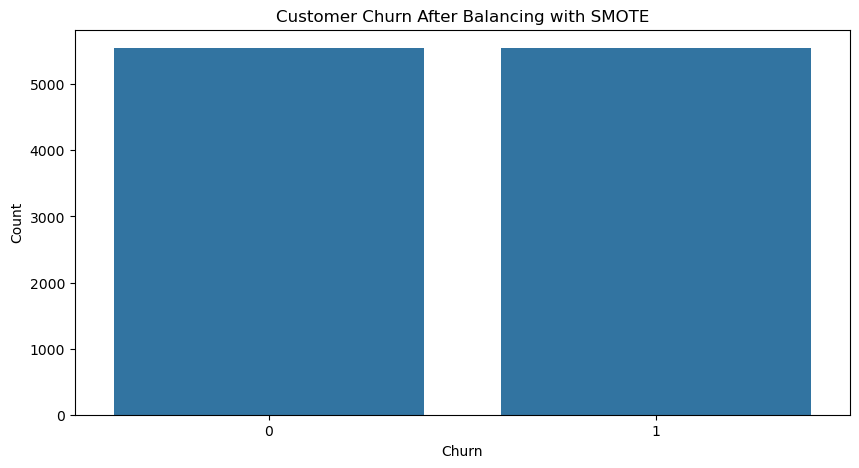

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Exited', data=y_train_balanced_df)
plt.title('Customer Churn After Balancing with SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

TRAINING LOGISTIC REGRESSION MODEL:

In [18]:
from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier(n_estimators=100, random_state=42)
lr.fit(x_train_balanced,y_train_balanced)

RandomForestClassifier(random_state=42)

In [19]:
y_pred=lr.predict(x_test)

In [20]:
y_pred_proba = lr.predict_proba(x_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
 [[2191  225]
 [ 234  350]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      2416
           1       0.61      0.60      0.60       584

    accuracy                           0.85      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.85      0.85      0.85      3000

ROC-AUC Score: 0.8488313497913454


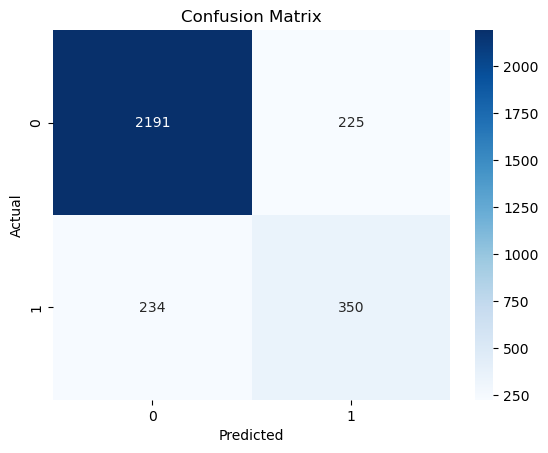

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
ac=accuracy_score(y_test,y_pred)

In [23]:
print("the accuracy score is:",ac*100)

the accuracy score is: 84.7


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [25]:
print(df)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

CREATING TEST DATASET:

In [26]:
random_info=[]
for _ in range(20):
    new_info={
        'CreditScore':np.random.randint(600,700),
        'Geography':np.random.randint(0,3),
        'Gender':np.random.randint(0,2),
        'Age':np.random.randint(25,55),
        'Tenure':np.random.randint(1,10),
        'Balance':np.random.uniform(0,2000000),
        'NumOfProducts':np.random.randint(1,4),
        'HasCrCard':np.random.randint(0,2),
        'IsActiveMember':np.random.randint(0,2),
        'EstimatedSalary':np.random.uniform(100000,1000000),
        'Exited':np.random.randint(0,2)

    }
    random_info.append(new_info)

In [27]:
random_data=pd.DataFrame(random_info)


In [28]:
print(random_data)

    CreditScore  Geography  Gender  Age  Tenure       Balance  NumOfProducts  \
0           632          0       1   30       8  1.186498e+06              1   
1           659          1       0   32       9  5.414482e+05              3   
2           609          2       0   33       4  1.541105e+06              1   
3           675          2       1   53       4  1.819875e+06              1   
4           626          0       1   47       8  1.129753e+06              1   
5           672          1       1   42       3  1.091464e+06              2   
6           682          1       1   37       2  5.724549e+05              2   
7           696          0       1   31       4  9.730174e+05              1   
8           672          1       0   39       2  6.029693e+05              2   
9           672          2       0   53       9  1.220349e+06              1   
10          668          2       0   43       6  1.371424e+06              2   
11          673          1       0   47 

In [29]:
random_data.drop('Exited',axis=1,inplace=True)

PREDICTING THE DATASET:

In [30]:
random_pred=lr.predict(random_data)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RESULT OF PREDICTION OF TEST DATASET USING THE CREATED DATA MODEL:

In [31]:
for i,pred in enumerate(random_pred):
    if pred==0:
        print("customer churn: not churn")
    else:
        print("customer churn: churn")

customer churn: churn
customer churn: churn
customer churn: not churn
customer churn: churn
customer churn: churn
customer churn: churn
customer churn: churn
customer churn: churn
customer churn: churn
customer churn: not churn
customer churn: churn
customer churn: churn
customer churn: churn
customer churn: churn
customer churn: churn
customer churn: churn
customer churn: churn
customer churn: churn
customer churn: not churn
customer churn: churn
